In [1]:
import os
print(os.getcwd())



C:\Users\shrey\OneDrive\Documents\Disaster-tweets-classification\notebooks


In [2]:
import pandas as pd
import numpy as np
import os


In [3]:
# Construct the path to the CSV file
data_path = os.path.join('..', 'data', 'train.csv')

In [4]:
# Load the dataset into a DataFrame
df = pd.read_csv(data_path)


In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df.shape

(7613, 5)

In [8]:
# Check for missing values in each column
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [10]:
# 1. Check data types
print(df.dtypes)

# 2. Check unique values and distribution of target column
print("\nTarget value counts:")
print(df['target'].value_counts())


id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Target value counts:
target
0    4342
1    3271
Name: count, dtype: int64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Make a folder for plots if not already there
import os
os.makedirs('../plots', exist_ok=True)


C:\Users\shrey\AppData\Local\Temp\ipykernel_23744\3375688797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


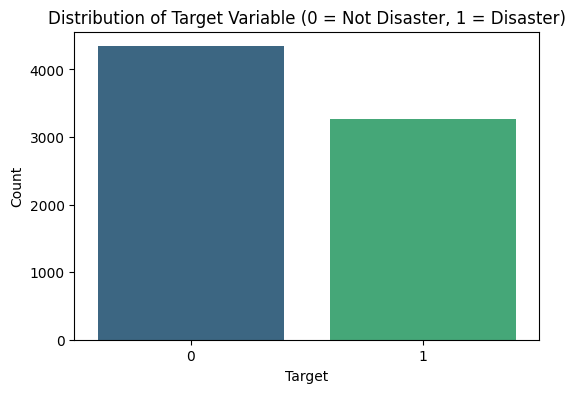

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='viridis')

plt.title('Distribution of Target Variable (0 = Not Disaster, 1 = Disaster)')
plt.xlabel('Target')
plt.ylabel('Count')

# Save the figure
plt.savefig('../plots/target_distribution.png', bbox_inches='tight', dpi=300)

plt.show()


In [14]:
#basic cleaning
import re

# Make a copy of the original text
df['clean_text'] = df['text'].copy()

# Convert to lowercase
df['clean_text'] = df['clean_text'].str.lower()

# Remove URLs
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Preview cleaned text
df[['text', 'clean_text']].head(3)


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,all residents asked to 'shelter in place' are ...


In [15]:
## Step 2.1: Further text cleaning - mentions, hashtags, punctuation, etc.
import re
import string

def clean_more(text):
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags symbol but keep the word
    text = re.sub(r'#', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the function to the already-lowercased column
df['clean_text'] = df['clean_text'].apply(clean_more)

df['clean_text'].head(10)  # optional: peek at cleaned tweets


0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    people receive wildfires evacuation orders in ...
4    just got sent this photo from ruby alaska as s...
5    rockyfire update california hwy closed in both...
6    flood disaster heavy rain causes flash floodin...
7    im on top of the hill and i can see a fire in ...
8    theres an emergency evacuation happening now i...
9     im afraid that the tornado is coming to our area
Name: clean_text, dtype: object

In [16]:
import nltk

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Get English stopwords set
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from tokenized words
def remove_stopwords(text):
    words = text.split()  # split into words
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply to the cleaned text
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [19]:
df['clean_text'].head(10)

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
5    rockyfire update california hwy closed directi...
6    flood disaster heavy rain causes flash floodin...
7                           im top hill see fire woods
8    theres emergency evacuation happening building...
9                        im afraid tornado coming area
Name: clean_text, dtype: object

In [23]:
import os
os.makedirs("plots", exist_ok=True)


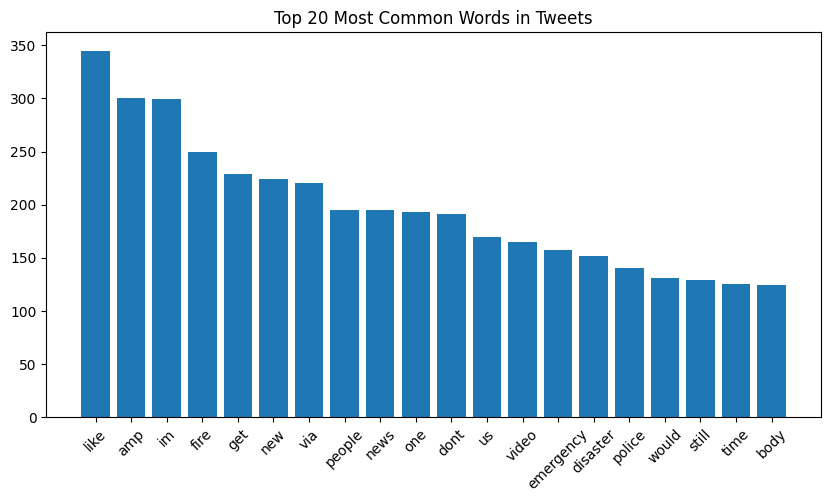

In [24]:
#most common words
from collections import Counter

all_words = ' '.join(df['clean_text']).split()
common_words = Counter(all_words).most_common(20)

words, freqs = zip(*common_words)
plt.figure(figsize=(10,5))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Tweets")
plt.savefig("plots/common_words_all.png")
plt.show()


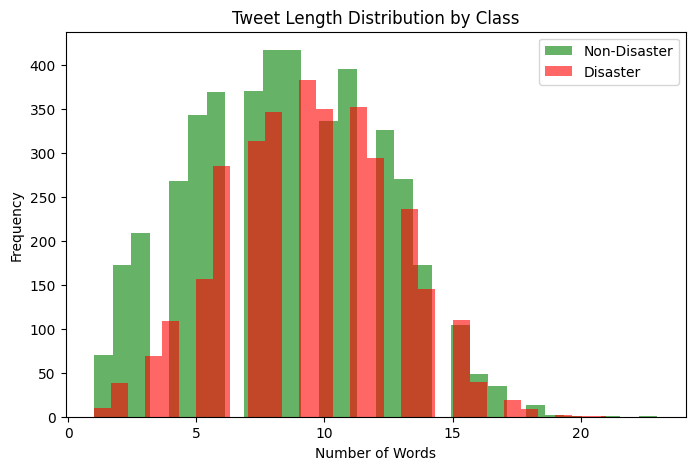

In [25]:
#tweet length dist
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
df[df['target']==0]['text_len'].plot(kind='hist', bins=30, alpha=0.6, label='Non-Disaster', color='green')
df[df['target']==1]['text_len'].plot(kind='hist', bins=30, alpha=0.6, label='Disaster', color='red')
plt.legend()
plt.title("Tweet Length Distribution by Class")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.savefig("plots/tweet_length_distribution.png")
plt.show()


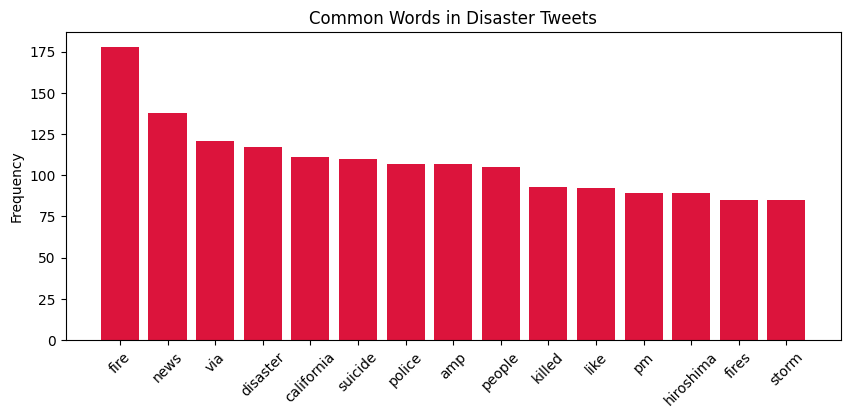

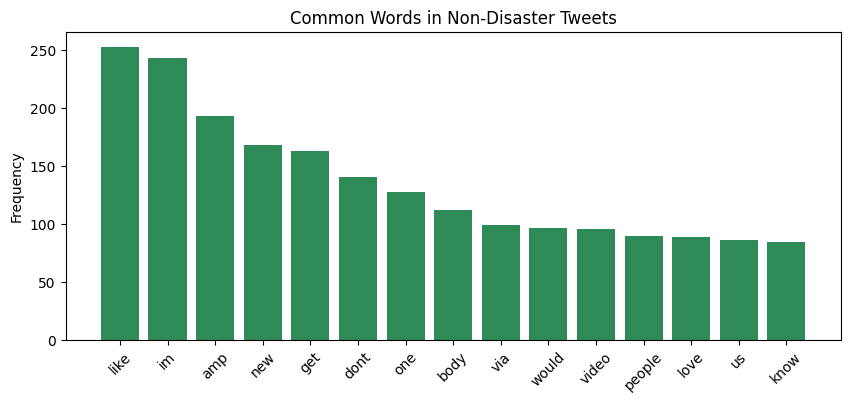

In [26]:
#most common words in each class
disaster_words = ' '.join(df[df['target']==1]['clean_text']).split()
nondisaster_words = ' '.join(df[df['target']==0]['clean_text']).split()

d_common = Counter(disaster_words).most_common(15)
nd_common = Counter(nondisaster_words).most_common(15)

# Disaster
plt.figure(figsize=(10,4))
plt.bar(*zip(*d_common), color='crimson')
plt.title("Common Words in Disaster Tweets")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.savefig("plots/common_disaster_words.png")
plt.show()

# Non-disaster
plt.figure(figsize=(10,4))
plt.bar(*zip(*nd_common), color='seagreen')
plt.title("Common Words in Non-Disaster Tweets")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.savefig("plots/common_non_disaster_words.png")
plt.show()


In [28]:
!pip install wordcloud

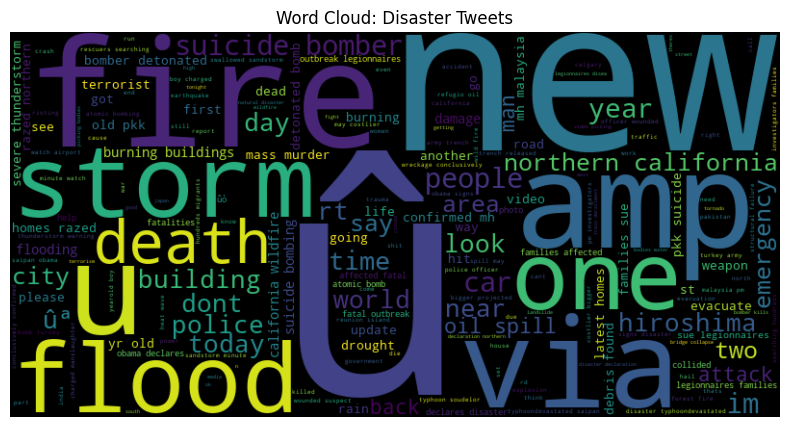

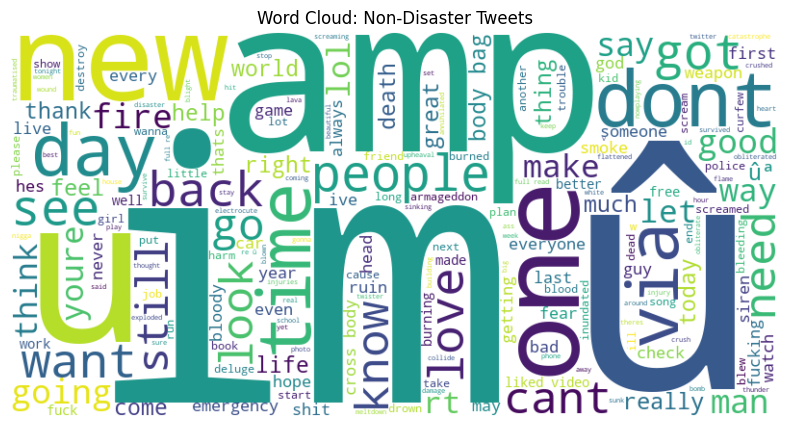

In [29]:
from wordcloud import WordCloud

# Disaster Tweets
disaster_text = ' '.join(df[df['target']==1]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(disaster_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Disaster Tweets")
plt.savefig("plots/wordcloud_disaster.png")
plt.show()

# Non-Disaster Tweets
nondisaster_text = ' '.join(df[df['target']==0]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nondisaster_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Non-Disaster Tweets")
plt.savefig("plots/wordcloud_non_disaster.png")
plt.show()
